# Context

This dataset contains all the incidents of crossing the border into the US as provided by the Bureau of Transportation Statistics, Govt. of the US. This dataset tells about the incoming counts into the US.
---

This data can be useful to predict the daily or weekly or monthly or annual traffic that's going to accumulate on the borders so that the authorities can be aware of the number beforehand.
---

Importing Libraries
---

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TRYING THIS LIBRARY OUT, LET'S SEE HOW THIS GOES...
import pandas.io.sql as psql
sql = psql.PandasSQL()

Creating Initial DF
---

In [42]:
df1 = pd.read_csv('input/Border_Crossing_Entry_Data.csv')
df1.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
dtype: int64

# Data Analysis

Checking out what the data looks like
---

In [43]:
df1.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


Changing the name of the "Measure" and "Value" columns so that the data is a little easier to understand
---

In [44]:
df1['Mode_of_Transportation'] = df1['Measure']
df1['Crossings'] = df1['Value']
df1 = df1.drop(columns=["Measure", "Value"])
df1.head()

,Port Name,State,Port Code,Border,Date,Mode_of_Transportation,Crossings
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


Checking the data types of each column
---

In [45]:
df1.dtypes

Port Name                 object
State                     object
Port Code                  int64
Border                    object
Date                      object
Mode_of_Transportation    object
Crossings                  int64
dtype: object

How many different ports/states/borders are we working with?
---

In [47]:
df1.nunique()

Port Name                   116
State                        15
Port Code                   117
Border                        2
Date                        290
Mode_of_Transportation       12
Crossings                 54814
dtype: int64

What's the breakdown of border crossings by state?
---

In [48]:
df1['State'].value_counts()

ND    58290
WA    45836
ME    39108
MT    38930
TX    36758
MN    23693
NY    21323
AZ    19747
CA    19553
VT    16727
AK    11787
MI    10372
ID     6762
NM     6615
OH       10
Name: State, dtype: int64

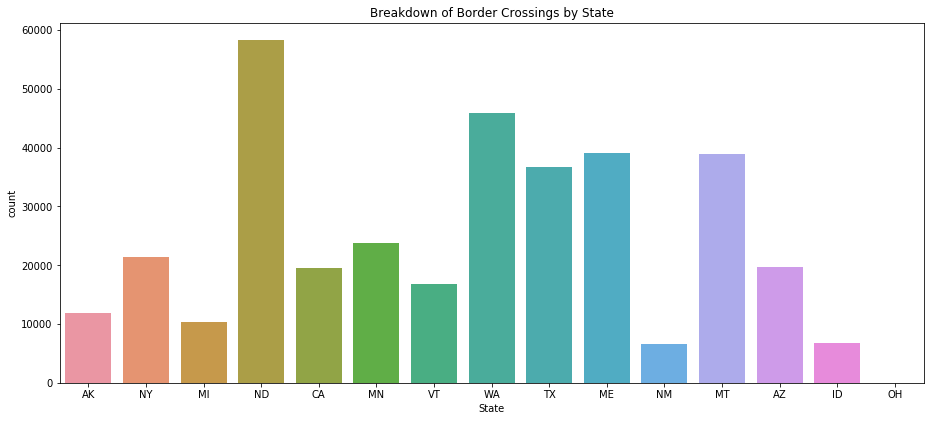

In [49]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x=df1['State'], data=df1, ax=ax)
plt.tight_layout()
plt.title('Breakdown of Border Crossings by State')
plt.show()

Checking the breakdown of crossings by border
---

In [50]:
df1['Border'].value_counts()

US-Canada Border    272838
US-Mexico Border     82673
Name: Border, dtype: int64

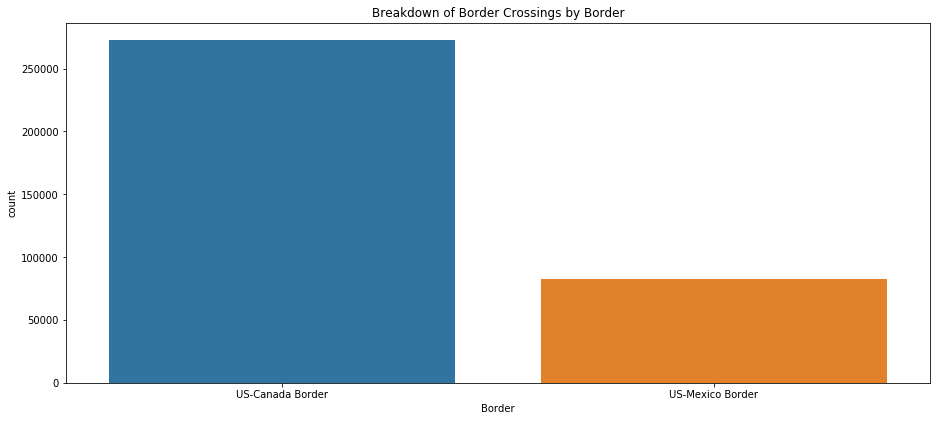

In [51]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x=df1['Border'], data=df1, ax=ax)
plt.tight_layout()
plt.title('Breakdown of Border Crossings by Border')
plt.show()

Now let's look at the border crossing trends over the years
---

First, we're going to break down the "Date" column into 3 seperate columns for day/month/year
---